In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os


from scipy.stats import linregress

# Pitching 




In [2]:
#getting the data and reading it 
path=os.path.join("projectdata/pitching.csv")
print(path)
data_pitch = pd.read_csv("projectdata/pitching.csv")
data_pitch

projectdata/pitching.csv


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,1,NYN,NL,0,1,17,0,0,...,1.0,0,1.0,0,41.0,3,5,0.0,1.0,0.0
47624,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,...,0.0,2,0.0,0,99.0,0,13,0.0,0.0,1.0
47625,zimmejo02,2019,1,DET,AL,1,13,23,23,0,...,2.0,3,6.0,0,504.0,0,89,3.0,4.0,5.0
47626,zimmeky01,2019,1,KCA,AL,0,1,15,0,0,...,0.0,2,0.0,0,102.0,3,22,0.0,0.0,1.0


In [3]:
data_pitch[["playerID",
           "yearID",
           "teamID",
           "R",
           "H",
           "SO",
           "L",
           "W"]]

,playerID,yearID,teamID,R,H,SO,L,W
0,bechtge01,1871,PH1,42,43,1,2,1
1,brainas01,1871,WS3,292,361,13,15,12
2,fergubo01,1871,NY2,9,8,0,0,0
3,fishech01,1871,RC1,257,295,15,16,4
4,fleetfr01,1871,NY2,21,20,0,1,0
...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,NYN,5,10,8,1,0
47624,zeuchtj01,2019,TOR,13,22,20,2,1
47625,zimmejo02,2019,DET,89,145,82,13,1
47626,zimmeky01,2019,KCA,22,28,18,1,0


In [4]:
#finding the total number of teams from the whole dataset
total_teamsp=data_pitch['teamID'].nunique()
total_teamsp

149

In [5]:
#finding the mean for wins, losses, hit, runs and strikeouts 
avg_hit_p = data_pitch.groupby("teamID").H.mean()
avg_run_p = data_pitch.groupby("teamID").R.mean()
avg_strikeouts_p = data_pitch.groupby("teamID").SO.mean()
avg_wins_p = data_pitch.groupby("teamID").W.mean()
avg_losses_p = data_pitch.groupby("teamID").L.mean()

pfinal_avg_df = pd.DataFrame({"Hit" : (avg_hit_p) ,
                            "Run" :(avg_run_p),
                            "Strikeouts" :(avg_strikeouts_p),
                            "Wins" : (avg_wins_p),
                            "Losses" : (avg_losses_p)})
pfinal_avg_df

,Hit,Run,Strikeouts,Wins,Losses
teamID,,,,,
ALT,58.400000,43.200000,18.600000,1.200000,3.800000
ANA,75.064103,39.250000,50.987179,4.256410,4.051282
ARI,59.353383,30.663534,50.210526,3.313910,3.385338
ATL,67.919384,33.028080,48.801630,4.015399,3.778080
BAL,73.784219,36.966989,48.090177,4.272142,4.165862
...,...,...,...,...,...
WS6,99.250000,84.500000,1.500000,1.250000,5.750000
WS7,161.000000,120.250000,58.750000,3.000000,12.750000
WS8,116.609756,79.024390,41.219512,3.902439,8.219512


In [6]:
#finding the top 10 and graphing
top_10_df = pfinal_avg_df.sort_values('Wins', ascending=False).head(10)
top_10_df

,Hit,Run,Strikeouts,Wins,Losses
teamID,,,,,
CHP,309.500000,192.500000,115.000000,18.750000,15.500000
BS1,234.461538,135.153846,19.076923,17.307692,4.615385
CNU,207.750000,116.500000,125.750000,17.250000,8.500000
HAR,228.400000,114.400000,42.600000,15.600000,9.600000
BRP,266.800000,178.600000,75.400000,15.200000,11.200000
SL3,210.800000,109.400000,47.000000,14.600000,10.200000
HR1,272.200000,162.800000,38.200000,14.000000,13.000000
NY2,265.000000,169.272727,29.636364,13.727273,11.090909
PHP,258.400000,171.000000,72.200000,13.600000,12.600000


<AxesSubplot:xlabel='teamID'>

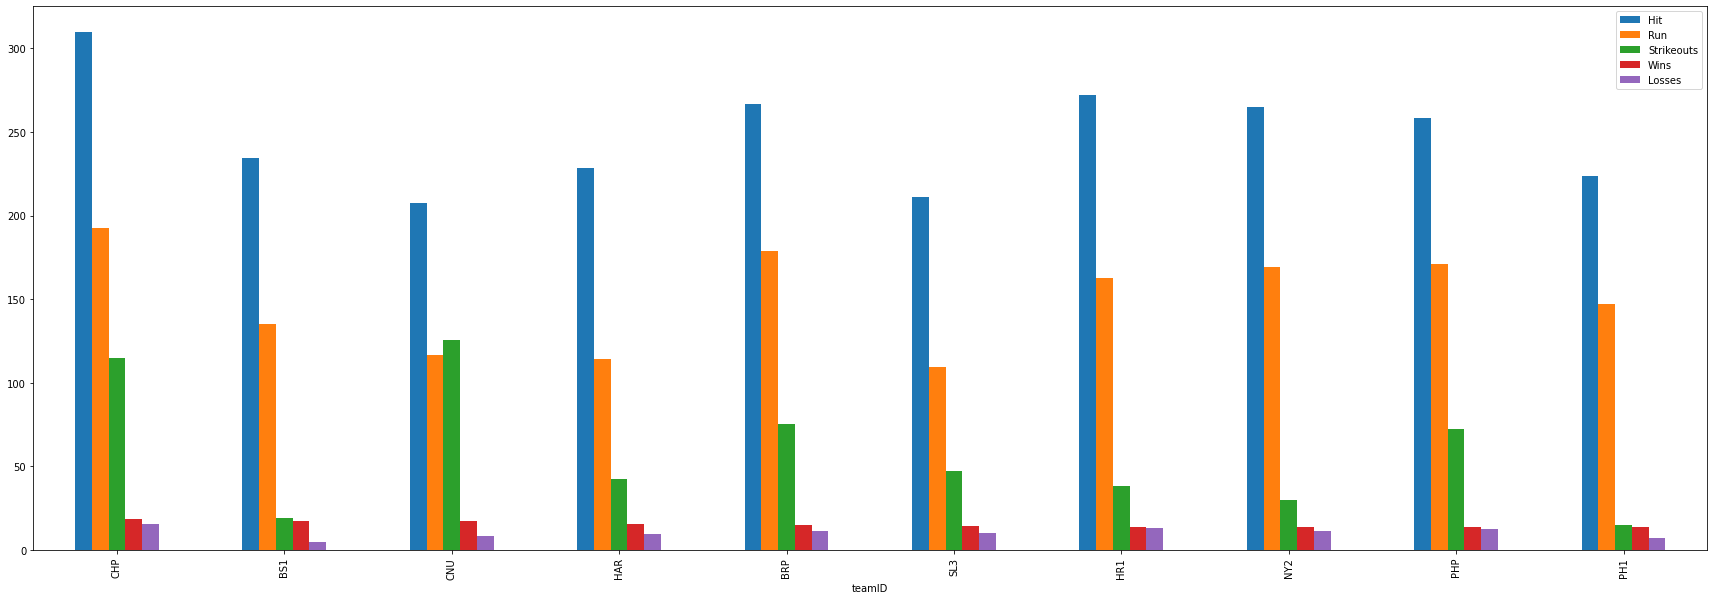

In [7]:
top_10_df.plot(kind= 'bar', figsize=(30,10))

<AxesSubplot:xlabel='teamID', ylabel='scores'>

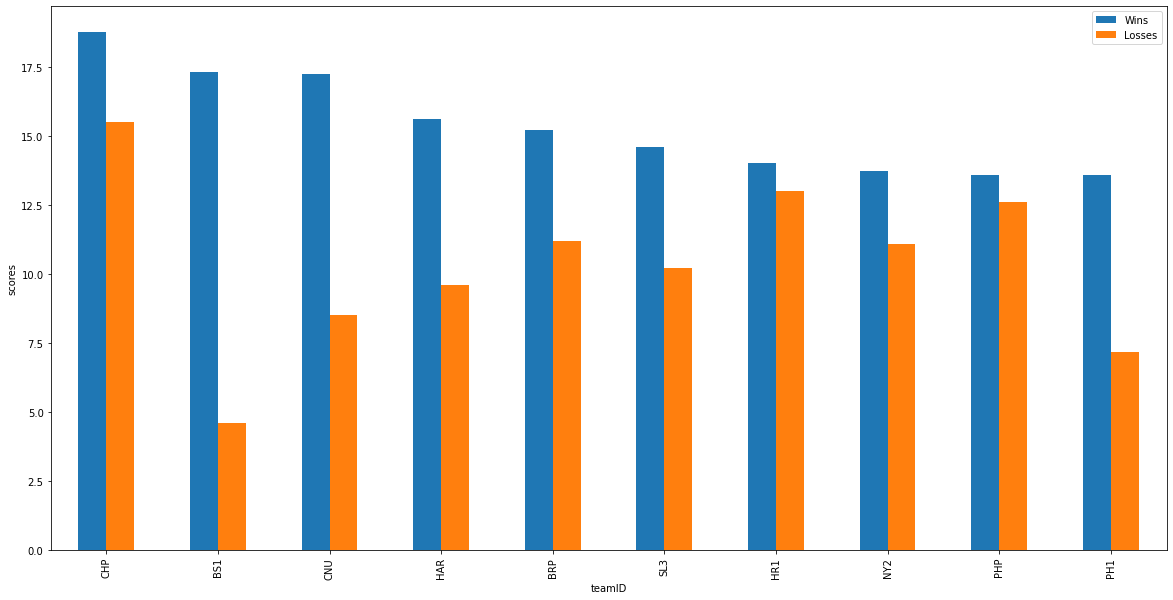

In [8]:
#graph for wins and losses for top 10 only 
top_10_df.plot(y=["Wins","Losses"],ylabel="scores",kind= "bar", figsize=(20,10))

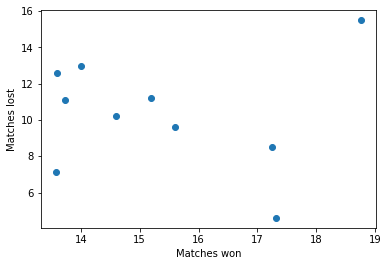

In [9]:
#wins vs loss scatter plot
x_values = top_10_df['Wins']
y_values = top_10_df['Losses']
plt.scatter(x_values,y_values)
plt.xlabel("Matches won")
plt.ylabel("Matches lost")
plt.show()

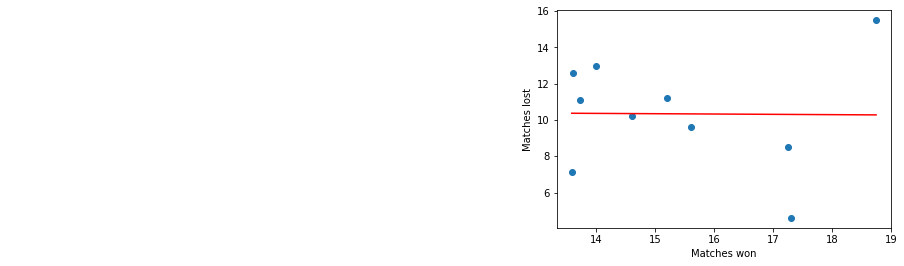

In [10]:
#adding linear regression equation and line to plot
x_values = top_10_df['Wins']
y_values = top_10_df['Losses']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) +"x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,8),fontsize=15,color="red")
plt.xlabel("Matches won")
plt.ylabel("Matches lost")
plt.show()

# PITCHING FROM YEAR 2010 TO 2019


In [11]:
#comparing the whole data with the last ten years 

In [12]:
#getting data from 2010 to 2019 for last 10 years
newdata = data_pitch[(2009 < data_pitch['yearID']) & (data_pitch['yearID'] == 2019)]
newdata

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
46699,abadfe01,2019,1,SFN,NL,0,2,21,0,0,...,0.0,1,0.0,0,49.0,1,6,0.0,0.0,3.0
46700,abreubr01,2019,1,HOU,AL,0,0,7,0,0,...,0.0,0,0.0,0,32.0,2,1,0.0,0.0,1.0
46701,adamja01,2019,1,TOR,AL,3,0,23,0,0,...,1.0,1,3.0,2,91.0,2,8,0.0,3.0,2.0
46702,adamsau01,2019,1,MIN,AL,0,0,2,0,0,...,0.0,0,0.0,0,15.0,1,5,0.0,0.0,0.0
46703,adamsau01,2019,2,DET,AL,0,0,13,0,0,...,1.0,0,0.0,0,65.0,8,8,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,1,NYN,NL,0,1,17,0,0,...,1.0,0,1.0,0,41.0,3,5,0.0,1.0,0.0
47624,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,...,0.0,2,0.0,0,99.0,0,13,0.0,0.0,1.0
47625,zimmejo02,2019,1,DET,AL,1,13,23,23,0,...,2.0,3,6.0,0,504.0,0,89,3.0,4.0,5.0
47626,zimmeky01,2019,1,KCA,AL,0,1,15,0,0,...,0.0,2,0.0,0,102.0,3,22,0.0,0.0,1.0


In [13]:
#finding the number of total teams that play currently 
total_teamsnew=newdata['teamID'].nunique()
total_teamsnew

30

In [14]:
newdata[["playerID",
           "yearID",
           "teamID",
           "R",
           "H",
           "SO",
           "L",
           "W"]]

,playerID,yearID,teamID,R,H,SO,L,W
46699,abadfe01,2019,SFN,6,9,9,2,0
46700,abreubr01,2019,HOU,1,4,13,0,0
46701,adamja01,2019,TOR,8,15,18,0,3
46702,adamsau01,2019,MIN,5,4,5,0,0
46703,adamsau01,2019,DET,8,14,9,0,0
...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,NYN,5,10,8,1,0
47624,zeuchtj01,2019,TOR,13,22,20,2,1
47625,zimmejo02,2019,DET,89,145,82,13,1
47626,zimmeky01,2019,KCA,22,28,18,1,0


In [15]:
#finding the average for hit,run,strikeouts,wins and losses
avg_hit_pnew = newdata.groupby("teamID").H.mean()
avg_run_pnew = newdata.groupby("teamID").R.mean()
avg_strikeouts_pnew = newdata.groupby("teamID").SO.mean()
avg_wins_pnew = newdata.groupby("teamID").W.mean()
avg_losses_pnew = newdata.groupby("teamID").L.mean()

pnewfinal_avg_df = pd.DataFrame({"Hit" : (avg_hit_pnew) ,
                            "Run" :(avg_run_pnew),
                            "Strikeouts" :(avg_strikeouts_pnew),
                            "Wins" : (avg_wins_pnew),
                            "Losses" : (avg_losses_pnew)})
pnewfinal_avg_df

,Hit,Run,Strikeouts,Wins,Losses
teamID,,,,,
ARI,51.851852,27.518519,52.851852,3.148148,2.851852
ATL,45.838710,23.967742,44.935484,3.129032,2.096774
BAL,40.631579,25.815789,32.842105,1.421053,2.842105
BOS,52.703704,30.666667,60.481481,3.111111,2.888889
CHA,53.259259,30.814815,48.592593,2.666667,3.296296
CHN,41.696970,21.727273,43.757576,2.545455,2.363636
CIN,48.846154,27.346154,59.692308,2.884615,3.346154
CLE,43.600000,21.900000,50.266667,3.100000,2.300000
COL,50.838710,30.903226,40.774194,2.290323,2.935484


In [16]:
#the top ten winners in descending order
top_10_newdf = pnewfinal_avg_df.sort_values('Wins', ascending=False).head(10)
top_10_newdf

,Hit,Run,Strikeouts,Wins,Losses
teamID,,,,,
LAN,48.040000,24.520000,60.760000,4.240000,2.240000
HOU,46.346154,24.615385,64.269231,4.115385,2.115385
SLN,55.826087,28.782609,60.826087,3.956522,3.086957
OAK,47.928571,24.285714,46.392857,3.464286,2.321429
MIN,46.967742,24.322581,47.193548,3.258065,1.967742
NYA,42.937500,23.093750,47.937500,3.218750,1.843750
ARI,51.851852,27.518519,52.851852,3.148148,2.851852
ATL,45.838710,23.967742,44.935484,3.129032,2.096774
BOS,52.703704,30.666667,60.481481,3.111111,2.888889


In [17]:
best_team = newdata[['teamID','W',"L"]]
best_team

,teamID,W,L
46699,SFN,0,2
46700,HOU,0,0
46701,TOR,3,0
46702,MIN,0,0
46703,DET,0,0
...,...,...,...
47623,NYN,0,1
47624,TOR,1,2
47625,DET,1,13
47626,KCA,0,1


In [18]:
pd.DataFrame.rename

<function pandas.core.frame.DataFrame.rename(self, mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')>

In [19]:
team_grp_df = best_team.groupby('teamID').sum().sort_values('W', ascending=False).rename(columns={'W':'Wins', 'L':'Losses'})
team_grp_df

,Wins,Losses
teamID,,
HOU,107,55
LAN,106,56
NYA,103,59
MIN,101,61
OAK,97,65
ATL,97,65
TBA,96,66
WAS,93,69
CLE,93,69


In [20]:
team_grp_df.head(10)

,Wins,Losses
teamID,,
HOU,107,55
LAN,106,56
NYA,103,59
MIN,101,61
OAK,97,65
ATL,97,65
TBA,96,66
WAS,93,69
CLE,93,69


In [21]:
#graphing ten years of wins and losses for each team based on the above data

<AxesSubplot:xlabel='teamID'>

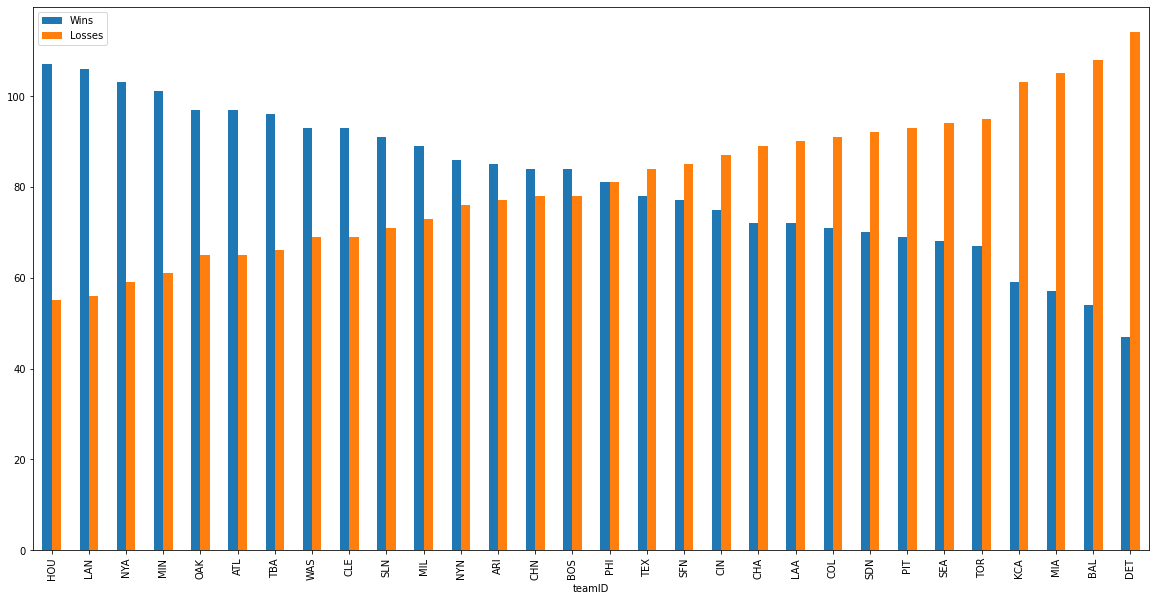

In [22]:
team_grp_df.plot(kind= "bar", figsize=(20,10))

In [24]:
newdata.groupby(['yearID','teamID'])[['W','L']].sum().sort_index(ascending=False).sort_values(['yearID','W'],ascending=False)



W    L
yearID teamID          
2019   HOU     107   55
       LAN     106   56
       NYA     103   59
       MIN     101   61
       OAK      97   65
       ATL      97   65
       TBA      96   66
       WAS      93   69
       CLE      93   69
       SLN      91   71
       MIL      89   73
       NYN      86   76
       ARI      85   77
       CHN      84   78
       BOS      84   78
       PHI      81   81
       TEX      78   84
       SFN      77   85
       CIN      75   87
       LAA      72   90
       CHA      72   89
       COL      71   91
       SDN      70   92
       PIT      69   93
       SEA      68   94
       TOR      67   95
       KCA      59  103
       MIA      57  105
       BAL      54  108
       DET      47  114

In [1]:
x_values = team_grp_df["Wins"]
y_values = team_grp_df["Losses"]
plt.scatter(x_values,y_values)
plt.legend()
plt.show

NameError: name 'team_grp_df' is not defined

In [33]:
#grouping by year
team_2010_df = newdata.groupby("yearID")
team_2010_df.head(20)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
46699,abadfe01,2019,1,SFN,NL,0,2,21,0,0,...,0.0,1,0.0,0,49.0,1,6,0.0,0.0,3.0
46700,abreubr01,2019,1,HOU,AL,0,0,7,0,0,...,0.0,0,0.0,0,32.0,2,1,0.0,0.0,1.0
46701,adamja01,2019,1,TOR,AL,3,0,23,0,0,...,1.0,1,3.0,2,91.0,2,8,0.0,3.0,2.0
46702,adamsau01,2019,1,MIN,AL,0,0,2,0,0,...,0.0,0,0.0,0,15.0,1,5,0.0,0.0,0.0
46703,adamsau01,2019,2,DET,AL,0,0,13,0,0,...,1.0,0,0.0,0,65.0,8,8,0.0,1.0,1.0
46704,adamsau02,2019,1,WAS,NL,0,0,1,0,0,...,0.0,2,1.0,0,6.0,0,1,0.0,0.0,0.0
46705,adamsau02,2019,2,SEA,AL,2,2,29,2,0,...,0.0,2,0.0,0,124.0,3,13,0.0,1.0,3.0
46706,adamsch01,2019,1,NYA,AL,1,1,13,0,0,...,0.0,1,2.0,1,124.0,5,25,0.0,0.0,2.0
46707,adriaeh01,2019,1,MIN,AL,0,0,1,0,0,...,0.0,0,0.0,0,8.0,1,3,0.0,0.0,0.0
46708,agrazda01,2019,1,PIT,NL,4,5,15,14,0,...,0.0,0,10.0,0,321.0,0,43,2.0,1.0,5.0
